In [1]:
import math
import numpy as np

# Question 1(a) Binomial Pricing 

In [2]:
def european_call_option(k, i):
    if(callstore[k][no_of_divisions+i] != -1.0): 
        return callstore[k][no_of_divisions+i]
    if (k == no_of_divisions):
        callstore[k][no_of_divisions+i] = max(0.0, (initial_stock_price*pow(up_factor, i)) - strike_price)
        return callstore[k][no_of_divisions+i]
    else:
        callstore[k][no_of_divisions+i] = (uptick_prob*european_call_option(k+1, i+1)
                                           + (1-uptick_prob)*european_call_option(k+1, i-1))/R
        return callstore[k][no_of_divisions+i]

In [3]:
def european_put_option(k, i):
    if(putstore[k][no_of_divisions+i] != -1.0): 
        return putstore[k][no_of_divisions+i]
    
    if (k == no_of_divisions):
        putstore[k][no_of_divisions+i] = max(0.0, strike_price - (initial_stock_price*pow(up_factor, (i))))
        return putstore[k][no_of_divisions+i]
    else:
        putstore[k][no_of_divisions+i] = (uptick_prob*european_put_option(k+1, i+1) 
                                         + (1-uptick_prob)*european_put_option(k+1, i-1))/R
        return putstore[k][no_of_divisions+i]

In [4]:
no_of_divisions = 1000

In [5]:
# value of option on ABC
risk_free_rate = 0.01
strike_price = 100
initial_stock_price = 101.17
expiration_time = 0.08333
volatility = 0.45

callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
for i in range(2*no_of_divisions+2):
    for j in range(2*no_of_divisions+2):
        callstore[i][j] = -1.0
        putstore[i][j] = -1.0
        
up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

ABC_Call = european_call_option(0, 0)
ABC_Put = european_put_option(0, 0)
print(ABC_Call)
print(ABC_Put)

5.858589086274135
4.605293796077261


In [6]:
# value of option on DEF
risk_free_rate = 0.01
strike_price = 150
initial_stock_price = 148.97
expiration_time = 0.08333
volatility = 0.37

callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
for i in range(2*no_of_divisions+2):
    for j in range(2*no_of_divisions+2):
        callstore[i][j] = -1.0
        putstore[i][j] = -1.0

up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

DEF_Call = european_call_option(0, 0)
DEF_Put = european_put_option(0, 0)
print(DEF_Call)
print(DEF_Put)

5.920232559424707
6.825289624128795


In [7]:
value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
print(value_of_portfolio)

113765.38602832238


# Question 1(b) Monte Carlo with Normal Dist.

In [4]:
no_of_trails = 1000
no_of_divisions = 100
u_ABC = 0.0005
u_DEF = 0.0004
sd_ABC = 0.028
sd_DEF = 0.023
corr = 0.4

P_L = []
for i in range(no_of_trails):
    mean = [u_ABC, 
            u_DEF]
    cov = [[sd_ABC*sd_ABC,      sd_ABC*sd_DEF*corr],
           [sd_ABC*sd_DEF*corr, sd_DEF*sd_DEF]      ]
    
    S_ABC_percent_change, S_DEF_percent_change = np.random.multivariate_normal(mean, cov)
    
    S_ABC = 101.17*(1 + S_ABC_percent_change)
    S_DEF = 148.97*(1 + S_DEF_percent_change)
    
    risk_free_rate = 0.01
    strike_price = 100
    initial_stock_price = S_ABC        
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.45

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0       

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))
    ABC_Call = european_call_option(0, 0)
    ABC_Put = european_put_option(0, 0)
    

    risk_free_rate = 0.01
    strike_price = 150
    initial_stock_price = S_DEF
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.37

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

    DEF_Call = european_call_option(0, 0)
    DEF_Put = european_put_option(0, 0)

    
    value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
    P_L.append(-(value_of_portfolio - 113765.38602832238))

In [5]:
one_percent_VaR = -np.quantile(P_L, 0.01)
one_percent_VaR

12374.54599071835

In [6]:
pos_re = np.sum(list(map(lambda x: x >= 0, P_L)))
pos_re

620

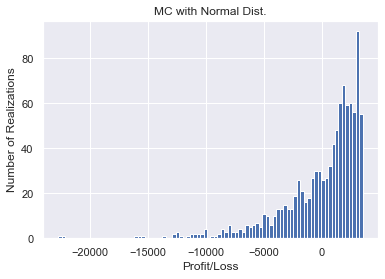

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.hist(P_L, bins=88)
plt.xlabel('Profit/Loss')
plt.ylabel('Number of Realizations')
plt.title('MC with Normal Dist.')
plt.show()

# Question 2 Horizon of 21 Days

In [74]:
no_of_trails = 1000
no_of_divisions = 100
u_ABC = 0.0005*21
u_DEF = 0.0004*21
sd_ABC = 0.028*math.sqrt(21)
sd_DEF = 0.023*math.sqrt(21)
corr = 0.4

risk_free_rate = 0.01
strike_price = 100

P_L_month = []
for i in range(no_of_trails):
    mean = [u_ABC, 
            u_DEF]
    cov = [[sd_ABC*sd_ABC,      sd_ABC*sd_DEF*corr],
           [sd_ABC*sd_DEF*corr, sd_DEF*sd_DEF]      ]
    
    S_ABC_percent_change, S_DEF_percent_change = np.random.multivariate_normal(mean, cov)
    
    S_ABC = 101.17*(1 + S_ABC_percent_change)
    S_DEF = 148.97*(1 + S_DEF_percent_change)
    
    re_ABC_Call = 5.858589086274135 - max(S_ABC - 100, 0)
    re_ABC_Put = 4.605293796077261 - max(100 - S_ABC, 0)
    re_DEF_Call = 5.920232559424707 - max(S_DEF - 150, 0)
    re_DEF_Put = 6.825289624128795 - max(150 - S_DEF, 0)
    portfolio_return = 6000*(re_ABC_Call + re_ABC_Put) + 4000*(re_DEF_Call + re_DEF_Put)
    P_L_month.append(portfolio_return)   

In [75]:
one_percent_VaR = -np.quantile(P_L_month, 0.01)
one_percent_VaR

185845.87487871823

In [76]:
pos_re = np.sum(list(map(lambda x: x >= 0, P_L_month)))
pos_re

567

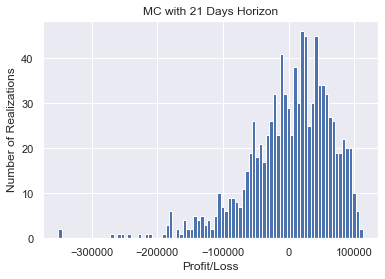

In [77]:
sns.set(color_codes=True)
plt.hist(P_L_month, bins=88)
plt.xlabel('Profit/Loss')
plt.ylabel('Number of Realizations')
plt.title('MC with 21 Days Horizon')
plt.show()

# Question 3 Monte Carlo with T Dist.

In [78]:
def multivariate_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal


In [87]:
no_of_trails = 1000
no_of_divisions = 100
u_ABC = 0.0005
u_DEF = 0.0004
sd_ABC = 0.028
sd_DEF = 0.023
corr = 0.4

P_L_t = []
for i in range(no_of_trails):
    mean = [u_ABC, 
            u_DEF]
    cov = [[0.5*sd_ABC*sd_ABC,      0.5*sd_ABC*sd_DEF*corr],
           [0.5*sd_ABC*sd_DEF*corr, 0.5*sd_DEF*sd_DEF]      ]
    
    rv = multivariate_t_rvs(mean, cov, 4, 1)
    S_ABC_percent_change = rv[0][0]
    S_DEF_percent_change = rv[0][1]
    
    
    S_ABC = 101.17*(1 + S_ABC_percent_change)
    S_DEF = 148.97*(1 + S_DEF_percent_change)
    
    risk_free_rate = 0.01
    strike_price = 100
    initial_stock_price = S_ABC        
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.45

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0       

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))
    
    ABC_Call = european_call_option(0, 0)
    ABC_Put = european_put_option(0, 0)
    

    risk_free_rate = 0.01
    strike_price = 150
    initial_stock_price = S_DEF
    expiration_time = 0.08333 - (1/252) 
    volatility = 0.37

    callstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    putstore = np.zeros((2*no_of_divisions+2, 2*no_of_divisions+2), dtype=np.double)
    for i in range(2*no_of_divisions+2):
        for j in range(2*no_of_divisions+2):
            callstore[i][j] = -1.0
            putstore[i][j] = -1.0

    up_factor = math.exp(volatility*math.sqrt(expiration_time/(no_of_divisions)))
    R = math.exp(risk_free_rate*expiration_time/(no_of_divisions))
    uptick_prob = (R - (1/up_factor))/(up_factor-(1/up_factor))

    DEF_Call = european_call_option(0, 0)
    DEF_Put = european_put_option(0, 0)

    
    value_of_portfolio = 60*100*(ABC_Call + ABC_Put) + 40*100*(DEF_Call + DEF_Put)
    P_L_t.append(-(value_of_portfolio - 113765.38602832238))

In [88]:
one_percent_VaR = -np.quantile(P_L_t, 0.01)
one_percent_VaR

18370.843111558625

In [89]:
pos_re = np.sum(list(map(lambda x: x >= 0, P_L_t)))
pos_re

717

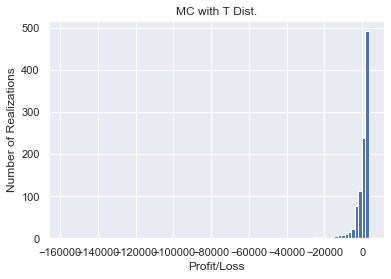

In [91]:
sns.set(color_codes=True)
plt.hist(P_L_t, bins=88)
plt.xlabel('Profit/Loss')
plt.ylabel('Number of Realizations')
plt.title('MC with T Dist.')
plt.show()